# EDA
Here we will explore data and find if it is Stationary and Seasonal

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
np.random.seed(42)

from statsmodels.tsa.stattools import adfuller
import plotly
from greykite.framework.input.univariate_time_series import UnivariateTimeSeries
from statsmodels.tsa.seasonal import seasonal_decompose

---

## Look at all states together

In [3]:
all_states = pd.read_csv(f'../data/all_states.csv', parse_dates=['week'])

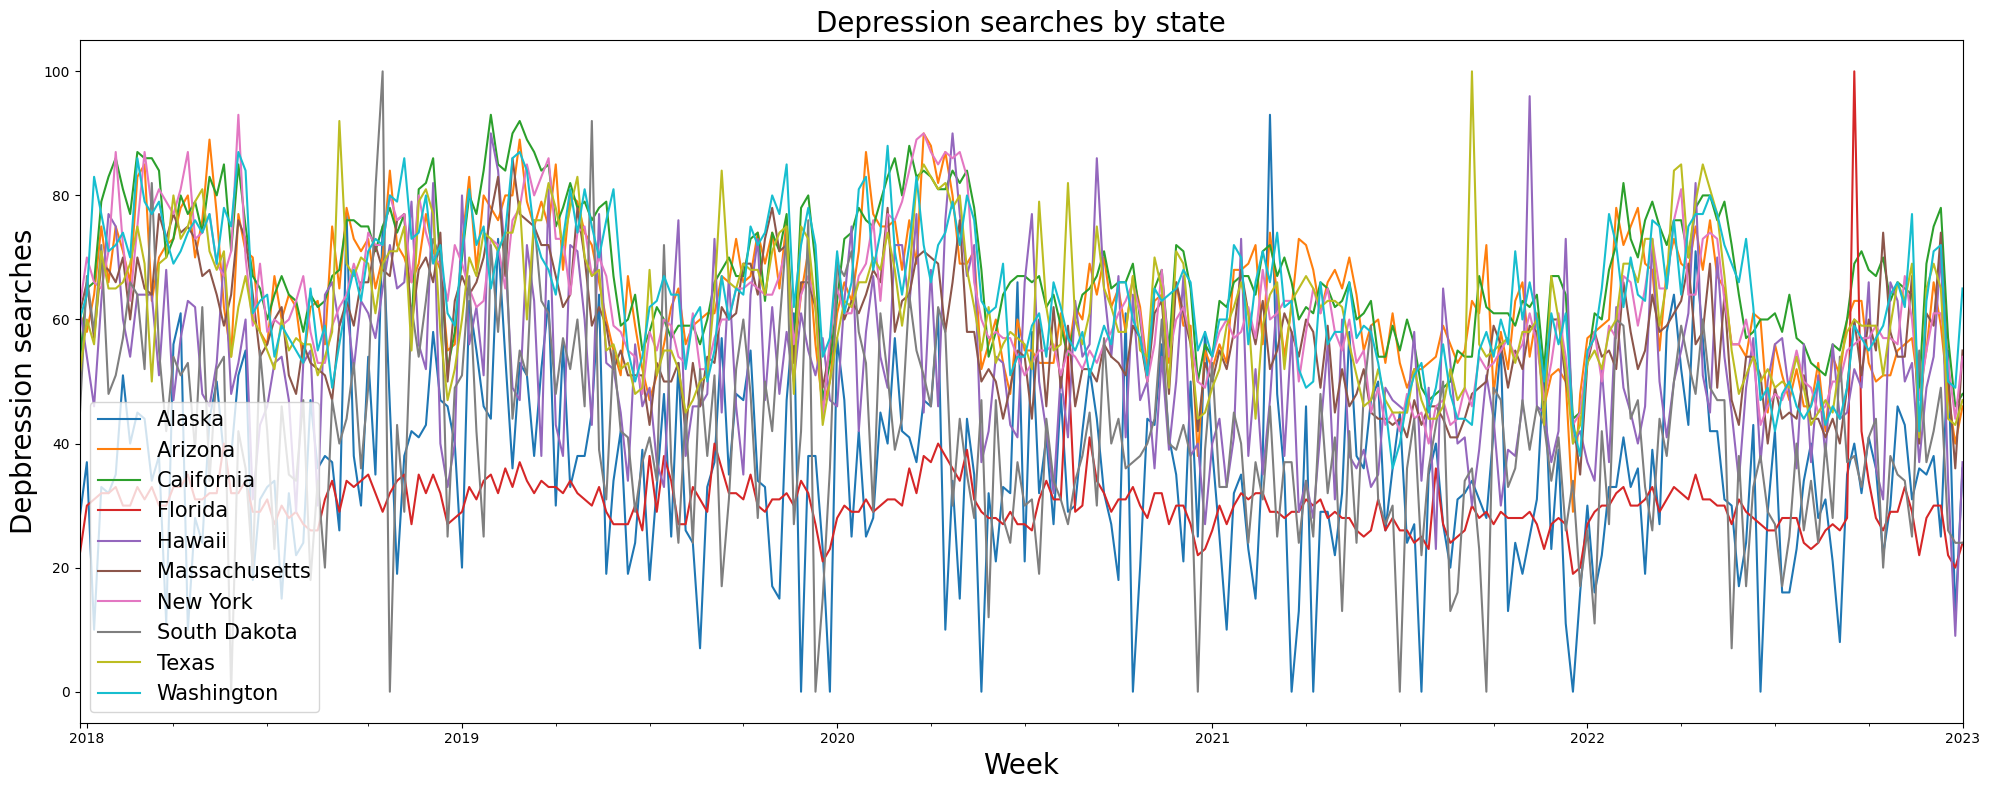

In [4]:
# Group by states and week

all_states.groupby(['week', 'state']).mean(numeric_only=True).unstack('state')['depression'].plot(figsize = (20, 8))
plt.xlabel('Week', size = 20)
plt.title('Depression searches by state', size = 20)
plt.ylabel('Depbression searches', size = 20)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.savefig('../images/Depression by state and week.jpeg');

Two much information for one plot, It is hard to see what is goen on for each state. The states needs to be grouped. We are looking at the COVID19 restrictions and will group states by restrictions levels.

---

## Look at States combined by COVID-19 restriction

In [5]:
def plot_search_by_week_restriction(search):
    '''
    Input: Search term
    Output: Plot for this search term by week and COVID Restrictions severity
    '''
    search_str = search.title()
    if search == 'mental_health':
        search_str = 'Mental Health'
    elif search == 'counselling':
        search_str = 'Counseling'
    all_states.groupby(['week', 'covid_restrictions']).mean(numeric_only=True).unstack('covid_restrictions')[search].plot(figsize = (20, 8))
    plt.xlabel('Week', size = 20)
    plt.title(f'{search_str} searches by COVID Restrictions severity', size = 20)
    plt.ylabel(f'{search_str} searches', size = 20)
    plt.legend(fontsize = 15)
    plt.tight_layout()
    plt.savefig(f'../images/{search_str} by covid_restrictions and week.jpeg');


In [6]:
# List of Search terms 
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']

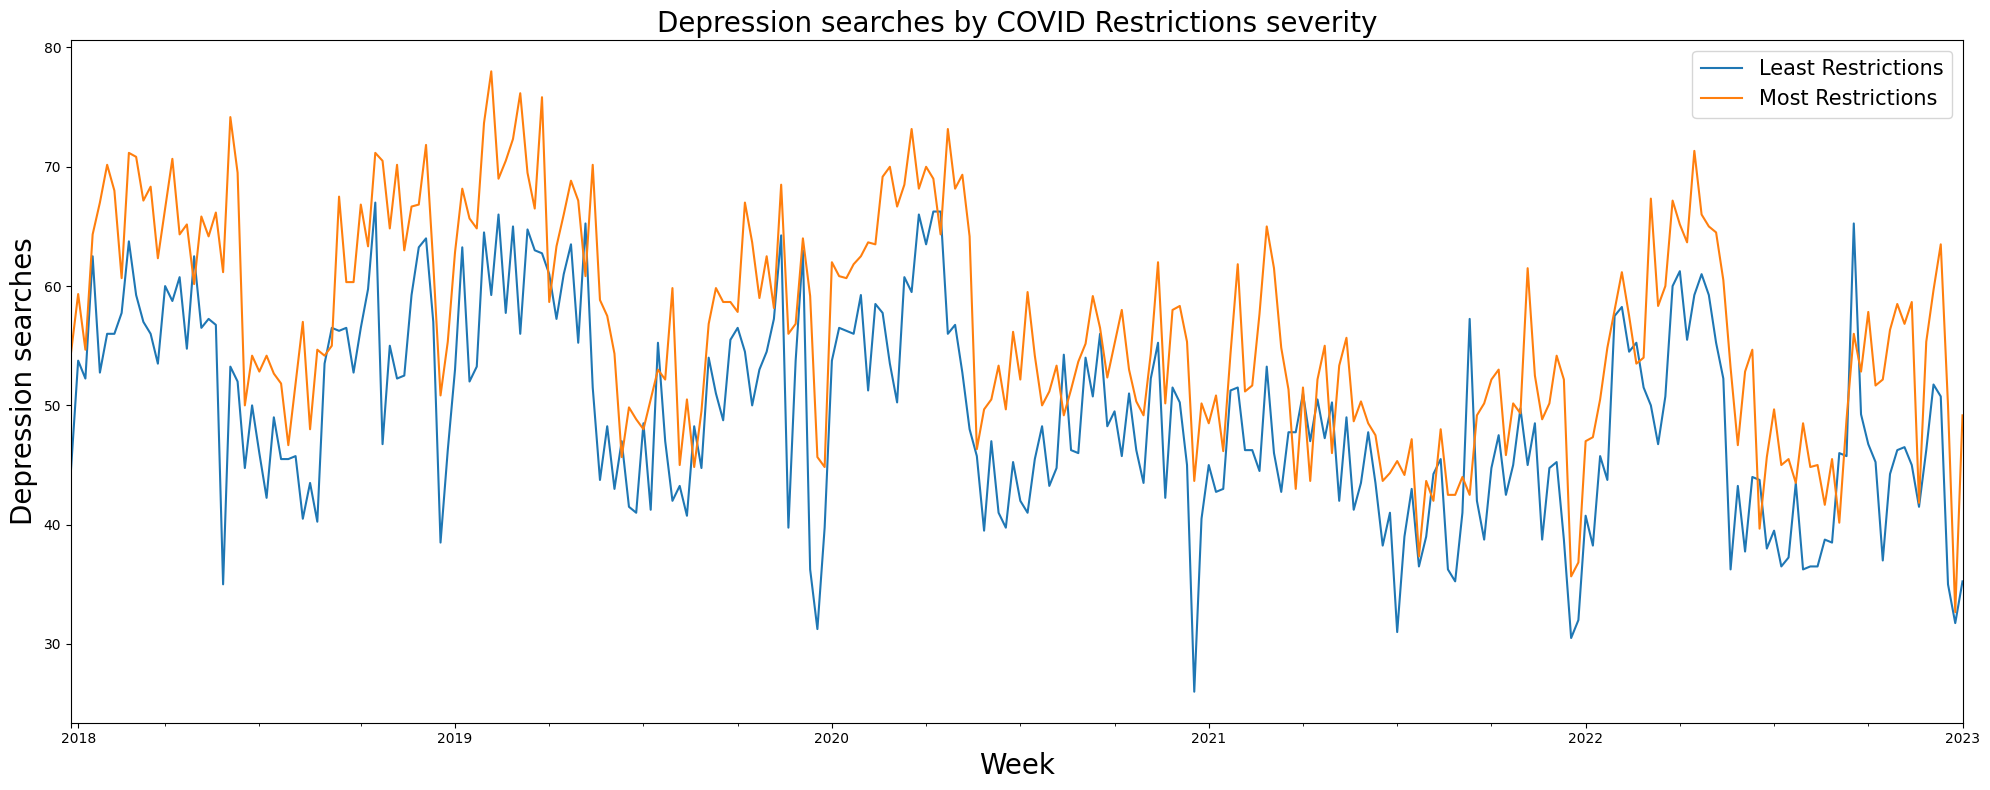

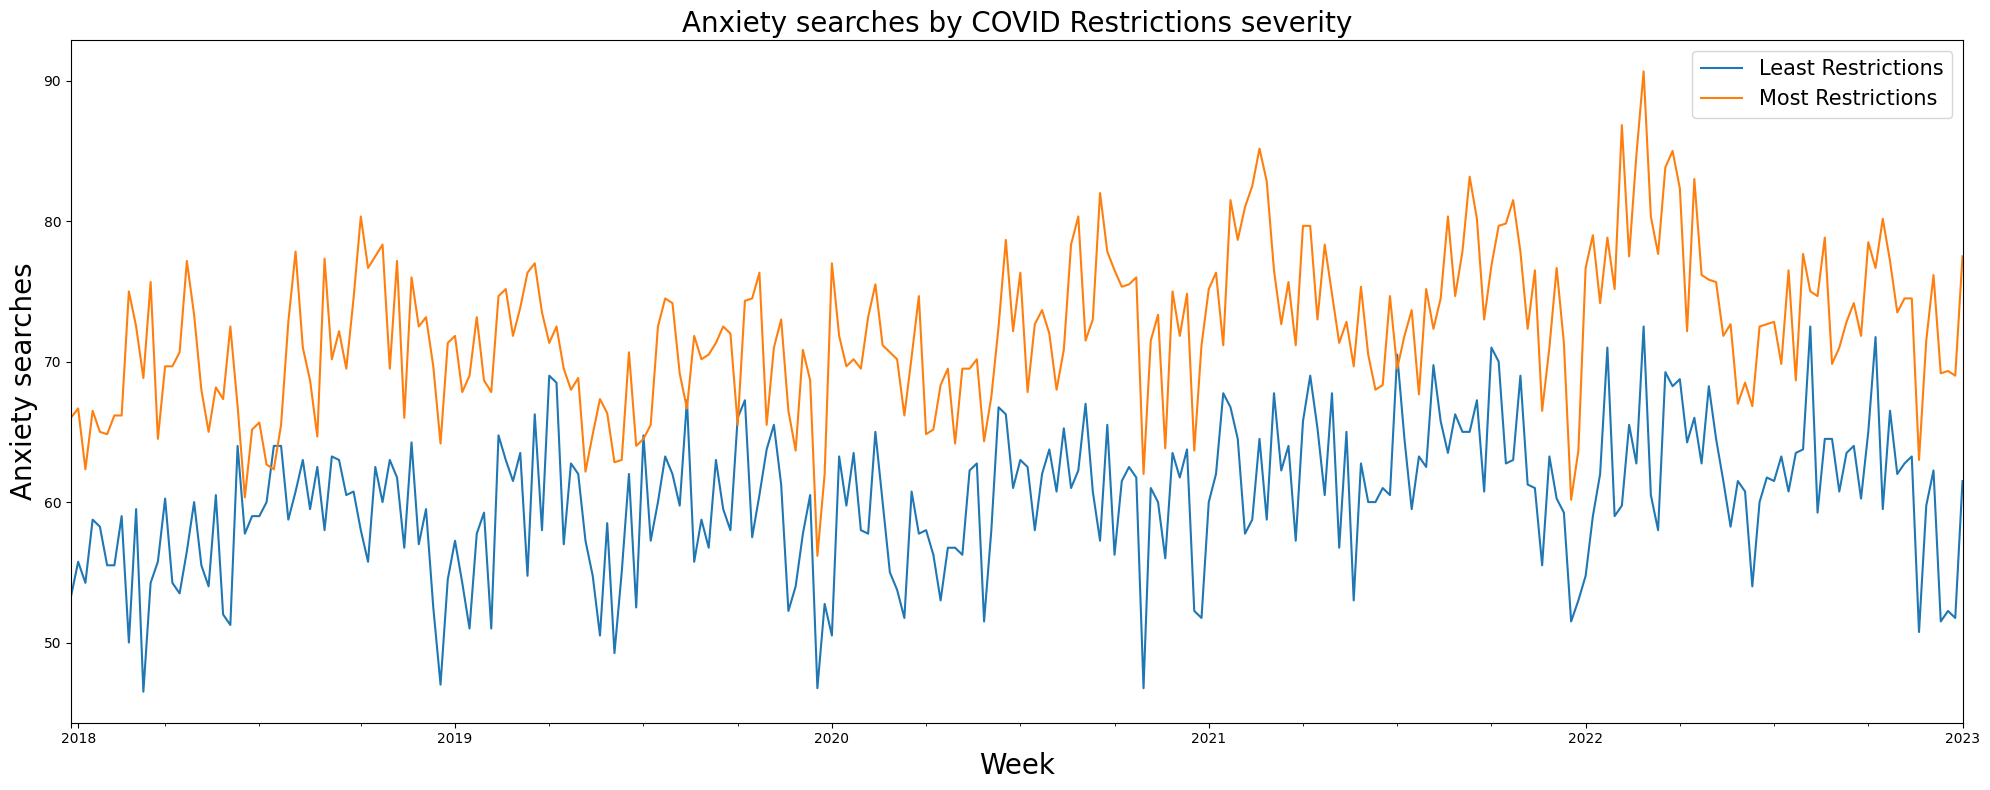

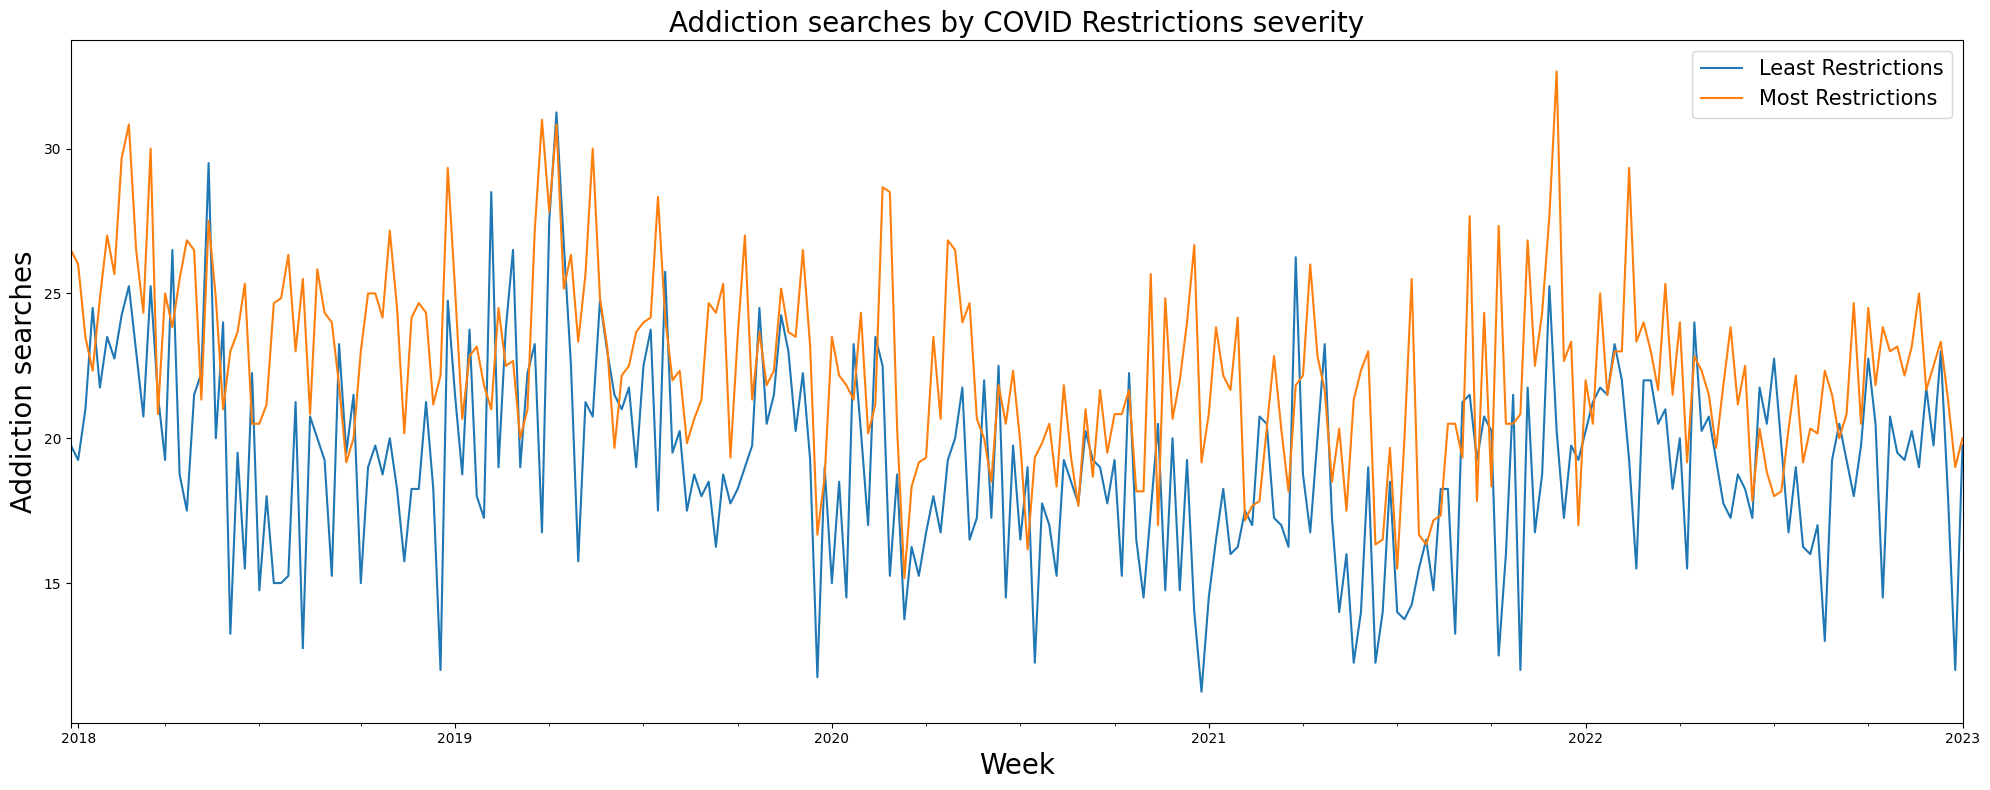

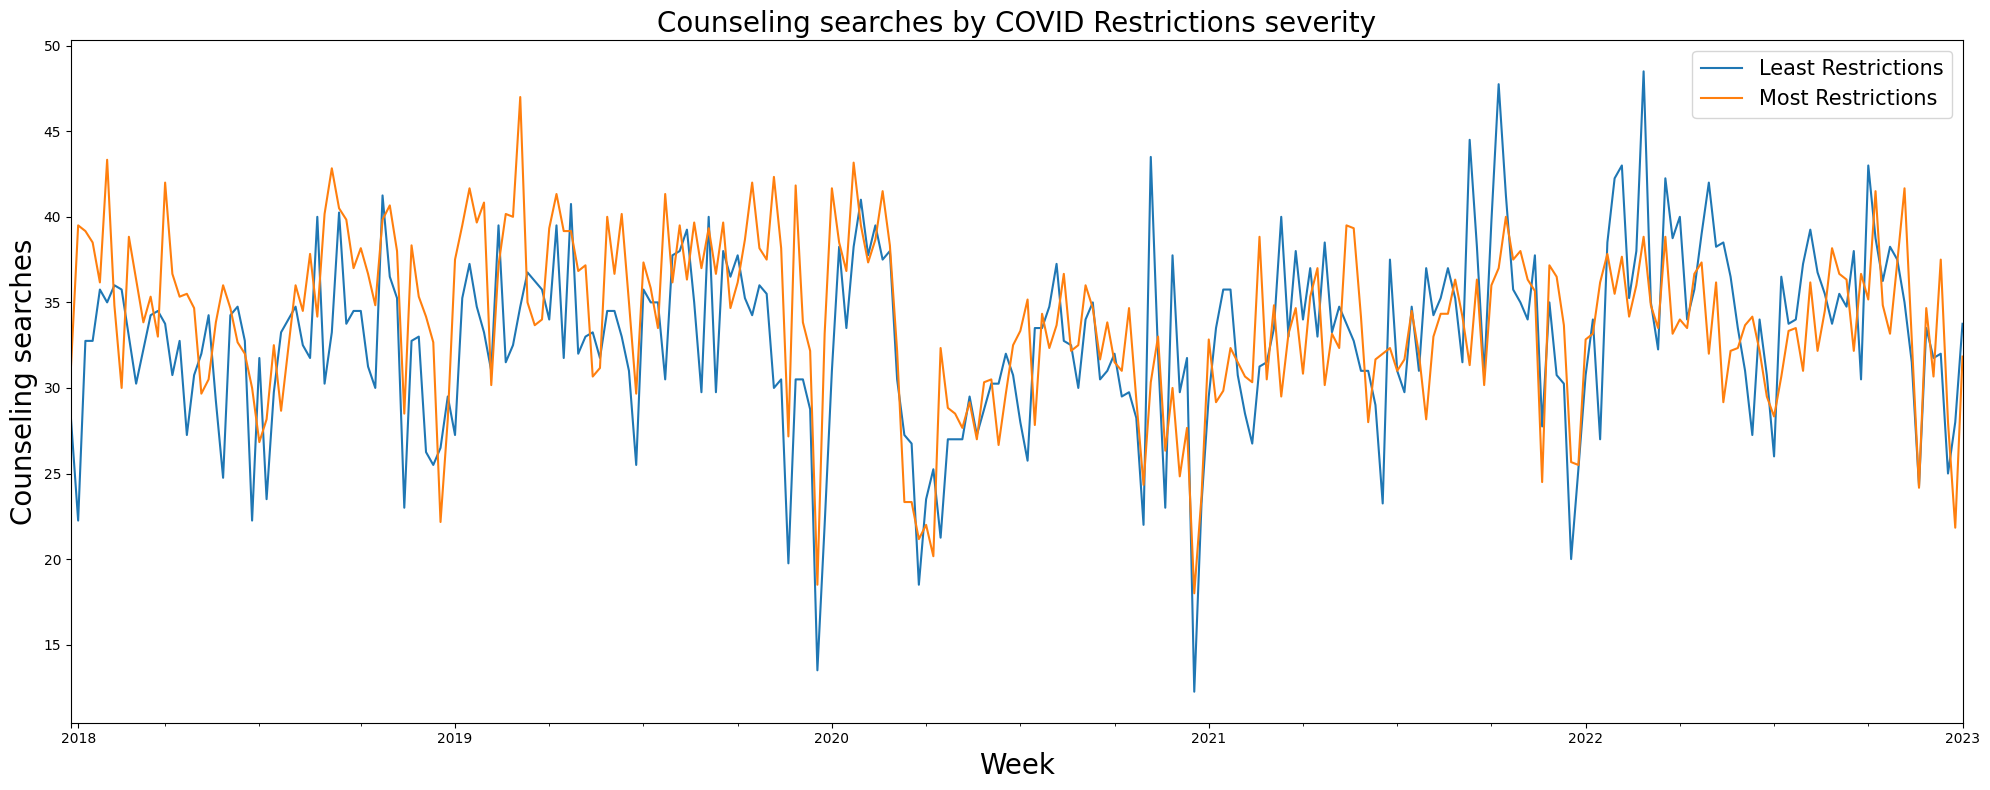

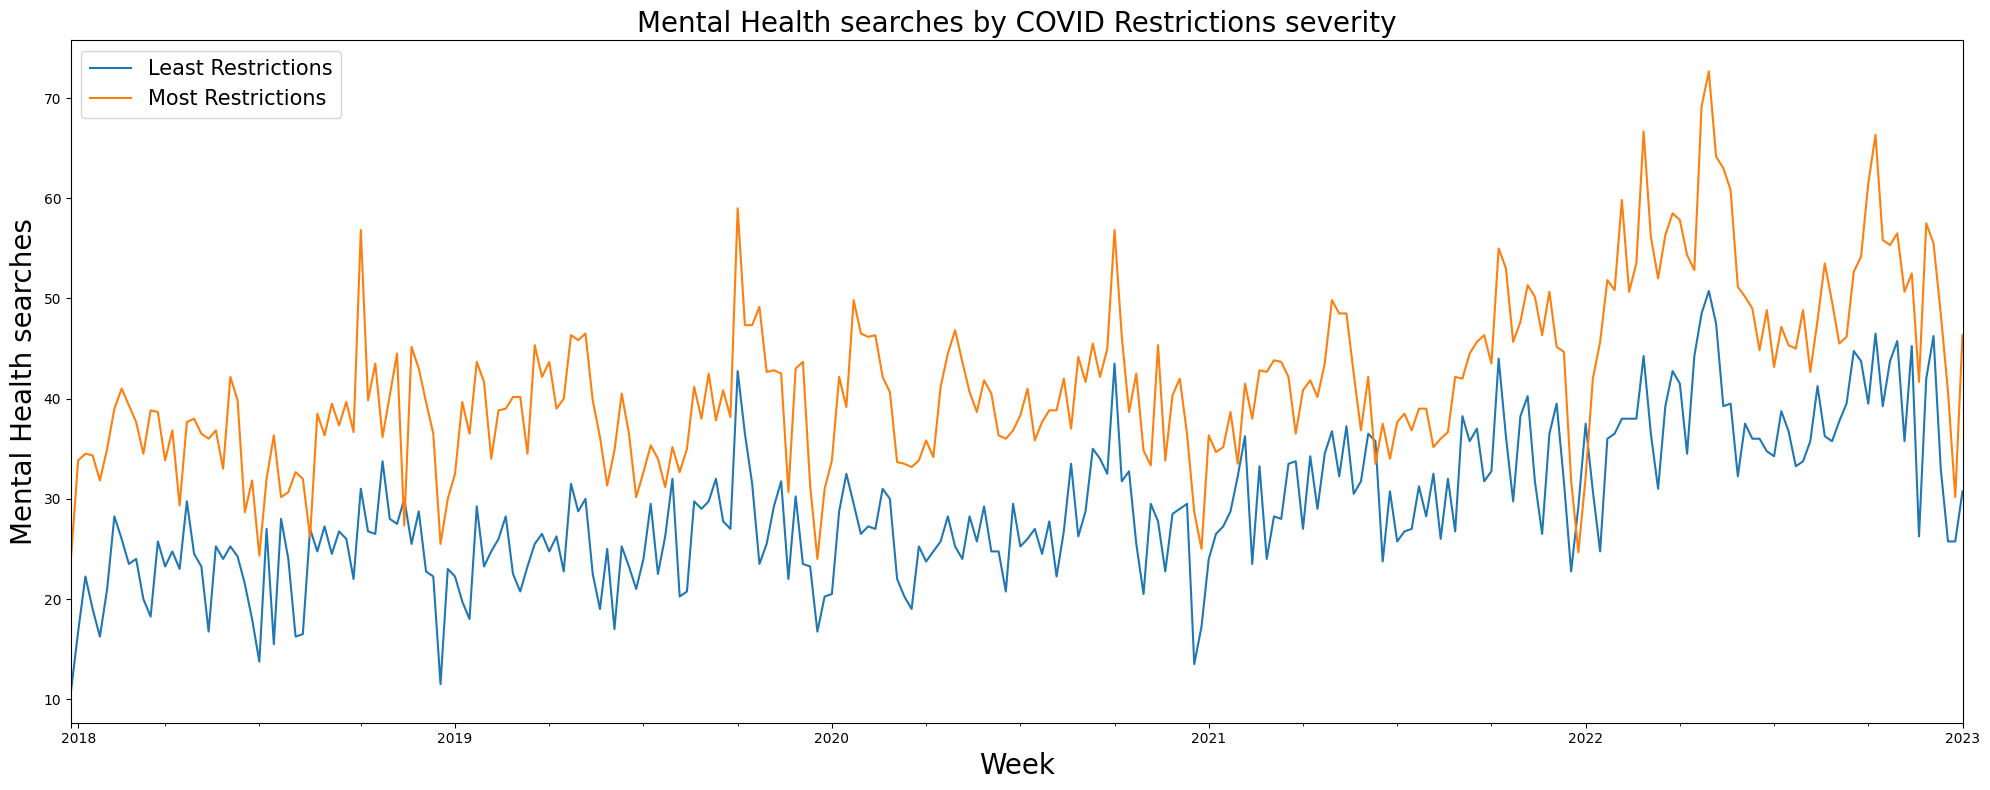

In [7]:
for search in searches_list:
    plot_search_by_week_restriction(search)

These groups provide better visuals and even for the Mental Health search there is a noticeable difference in searches in the middle of 2020 (COVID-19 Pandemic). Overall Most restricted states have more searches for each of these terms than Least restricted.

In [7]:
# Import data splited by restrictions level
most_restricted = pd.read_csv(f'../data/most_restricted.csv', parse_dates=['week'])
least_restricted = pd.read_csv(f'../data/least_restricted.csv', parse_dates=['week'])

---

## Stationary
For many time series models the data should be stationary.

In [8]:
# Check for Stationarity adapted from https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [9]:
# Check Most Restricted for stationarity
for name, column in most_restricted[['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']].items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "depression" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.5542
 No. Lags Chosen       = 5
 Critical value 1%     = -3.456
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 => P-Value = 0.0067. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "anxiety" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.102
 No. Lags Chosen       = 3
 Critical value 1%     = -3.456
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 => P-Value = 0.001. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "addiction" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significanc

All the Search Terms data for Most Restricted states are Stationary

In [10]:
# Check Least Restricted for stationarity
for name, column in least_restricted[['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']].items():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "depression" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.3563
 No. Lags Chosen       = 2
 Critical value 1%     = -3.456
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 => P-Value = 0.0004. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "anxiety" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.043
 No. Lags Chosen       = 4
 Critical value 1%     = -3.456
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 => P-Value = 0.0012. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "addiction" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significan

All the Search Terms data for Least Restricted states are Stationary

---

## Seasonality and statistics for the different searches 

In [11]:
def data_seasonality_stats(data, search):
    '''
    Plots to check for seasonality of data and descriptions of the columns
    Inputs:
    data - dataframe 
    search - search term
    
    Outputs:
    Description of search column 
    Monthly seasonality plot by year
    Weekly seasonality plot by year
    '''
    search_str = search.title()
    if search == 'mental_health':
        search_str = 'Mental Health'
    elif search == 'counselling':
        search_str = 'Counseling'
   
    # Make timeseries data
    ts = UnivariateTimeSeries()
    ts.load_data(
    df=data[['week', search]],
    time_col='week',
    value_col=search,
    freq='W-SUN')
    
    # Print Search stats
    
    print(f'Description of the {search_str} column')
    print(ts.describe_value_col())
    
    fig = ts.plot_quantiles_and_overlays(
    groupby_time_feature='month',
    show_mean=True,
    show_quantiles=False,
    show_overlays=True,
    center_values=True,
    overlay_label_time_feature='year',  
    overlay_style={'line': {'width': 1}, "opacity": 0.5},
    xlabel='Month',
    ylabel=ts.original_value_col,
    title=f'{search_str} Monthly seasonality by year (centered)')
    fig.write_image(f'../images/monthly_seasonality_{search}.jpeg')
    fig.show("svg")
    # plotly.io.show(fig) # for interactive plots in jupyter notebook
        
    fig = ts.plot_quantiles_and_overlays(
    groupby_time_feature='woy_dow',
    show_mean=True,
    show_quantiles=False,
    show_overlays=True,
    center_values=True,
    overlay_label_time_feature='year',  
    overlay_style={'line': {'width': 1}, 'opacity': 0.5},
    xlabel='Week of year',
    ylabel=ts.original_value_col,
    title=f'{search_str} Weekly seasonality by year (centered)')
    fig.show("svg")
    # plotly.io.show(fig) # for interactive plots in jupyter notebook
        

In [12]:
def season_decomp(data, search):
    '''
    Check for Seasonality and trend
    Input:
    data - Data Frame 
    search - string, the search term
    
    Outputs:
    Seasonality Decomposition plots
    '''
    data_index = data.copy()
    data_index.set_index('week', inplace=True)
    search_str = search.title()
    if search == 'mental_health':
        search_str = 'Mental Health'
    decomp = seasonal_decompose(data_index[search])
    decomp.plot();

### Most Restricted States

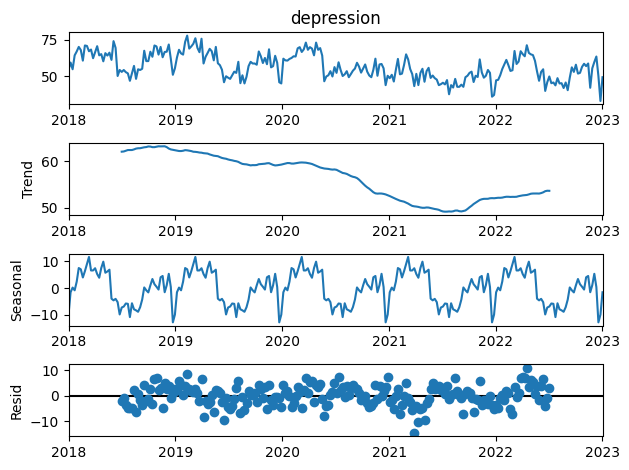

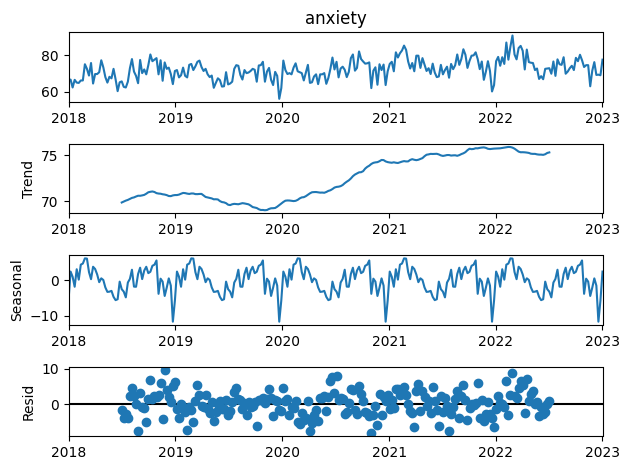

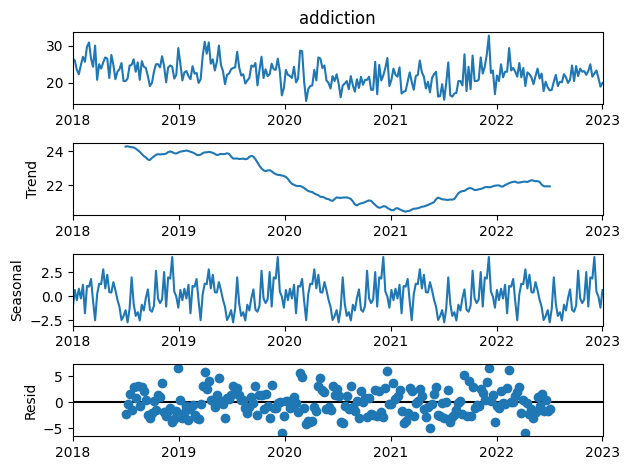

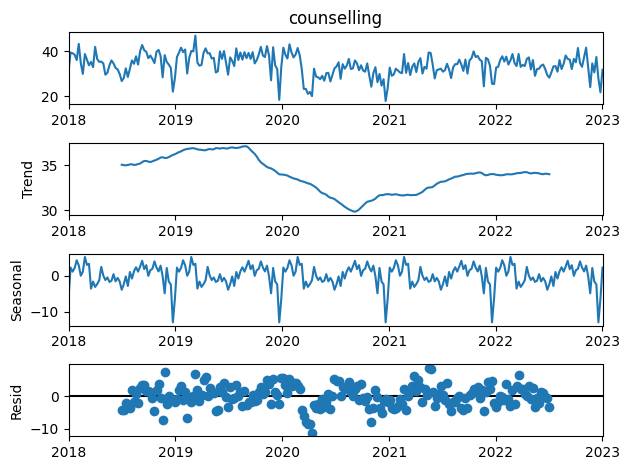

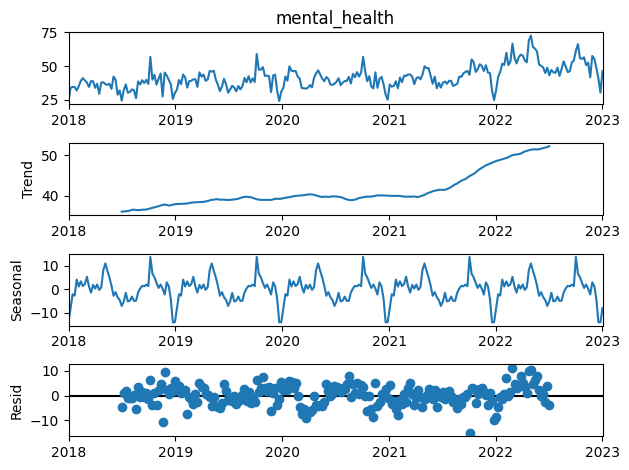

In [13]:
# Check seasonality
for search in searches_list:
    season_decomp(most_restricted, search)

All searches have some seasonality, I will explore Monthly and Weekly closer with more extensive graphs. 
The trends are different. Depression is going down. Mental Health and Anxiety are rising, Mental Health started to rise in the middle of 2021 after most of the restrictions were lifted. Anxiety had a rise at the beginning of the COVID restrictions and still stays high now. Counseling and Addiction both had a dip around the end of 2020. The overall trend is less obvious for them, but downwards.

Description of the Depression column
count    262.000000
mean      56.639313
std        8.960487
min       32.666667
25%       50.041667
50%       55.500000
75%       63.916667
max       78.000000
Name: y, dtype: float64


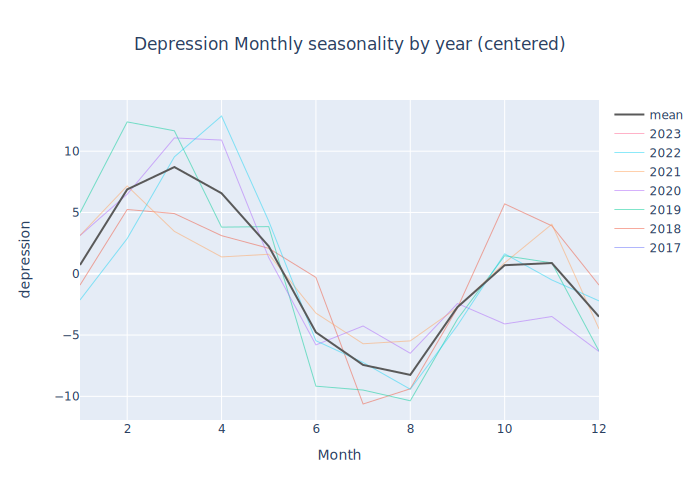

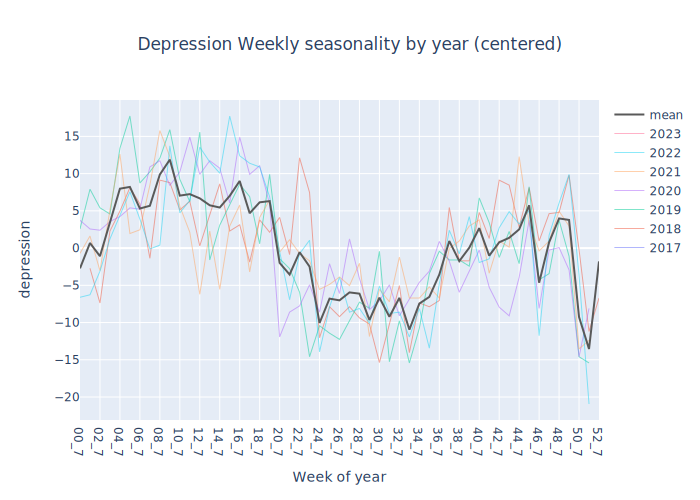

Description of the Anxiety column
count    262.000000
mean      72.227735
std        5.459152
min       56.166667
25%       68.666667
50%       72.166667
75%       75.958333
max       90.666667
Name: y, dtype: float64


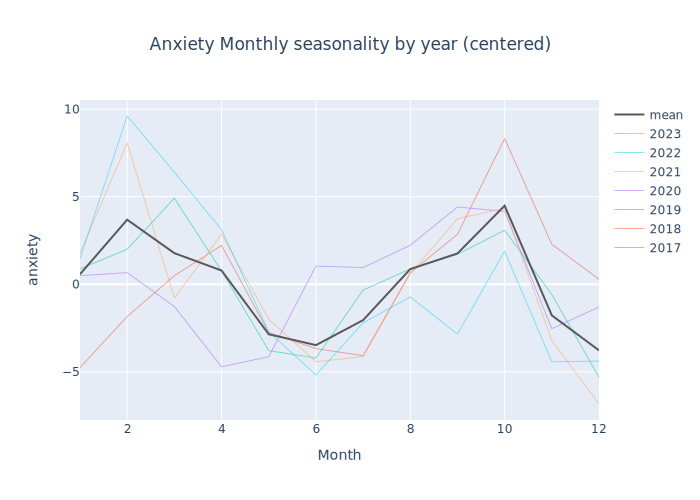

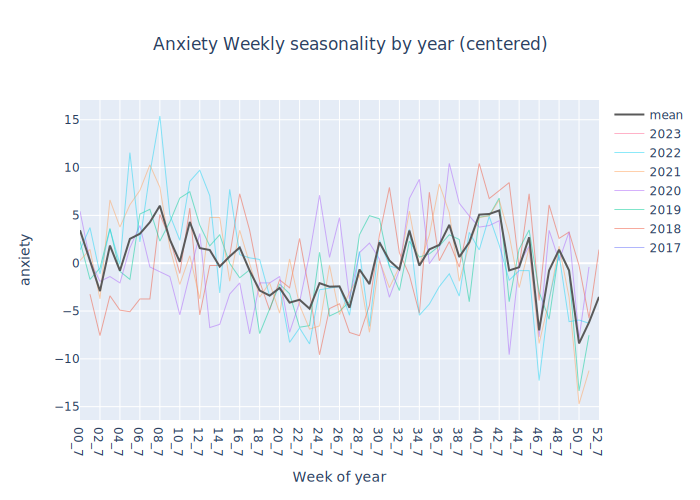

Description of the Addiction column
count    262.000000
mean      22.461832
std        3.146898
min       15.166667
25%       20.375000
50%       22.250000
75%       24.333333
max       32.666667
Name: y, dtype: float64


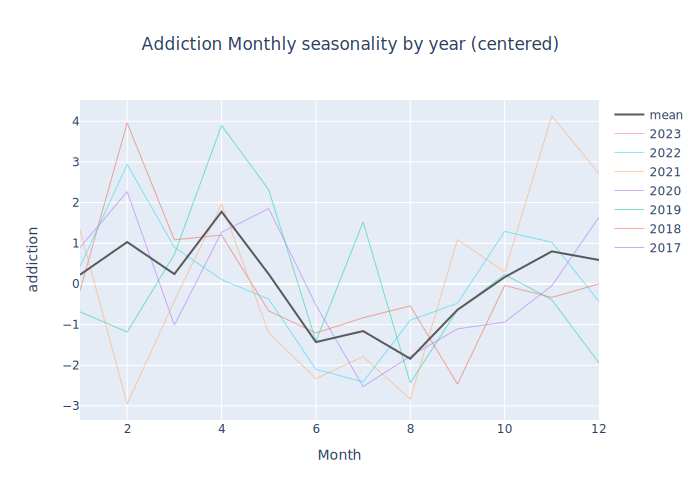

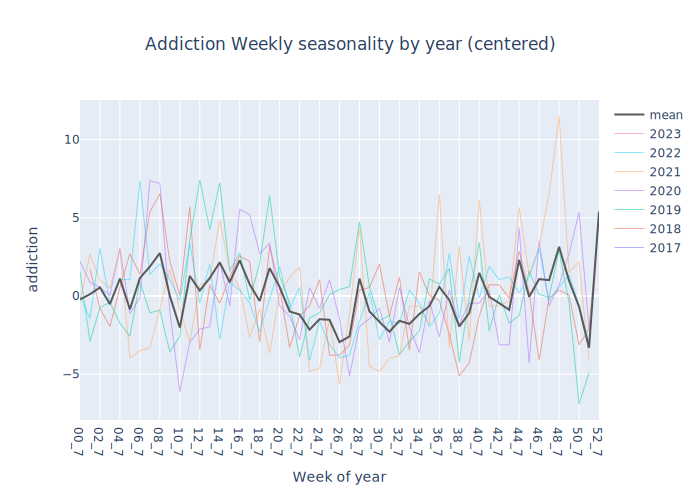

Description of the Counselling column
count    262.000000
mean      34.031807
std        4.810461
min       18.000000
25%       31.208333
50%       34.333333
75%       37.333333
max       47.000000
Name: y, dtype: float64


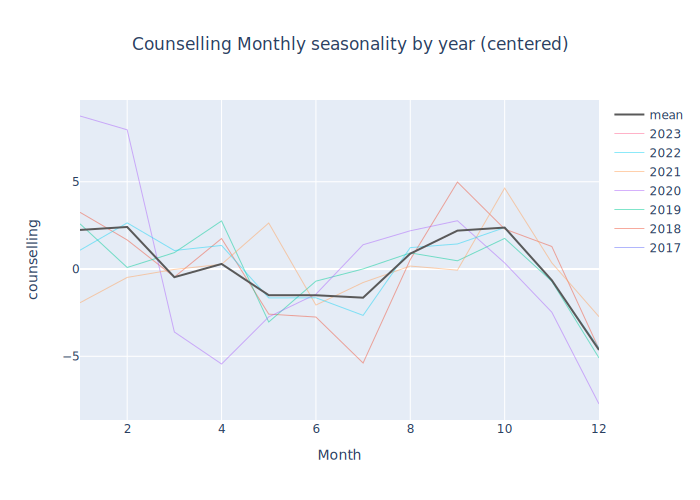

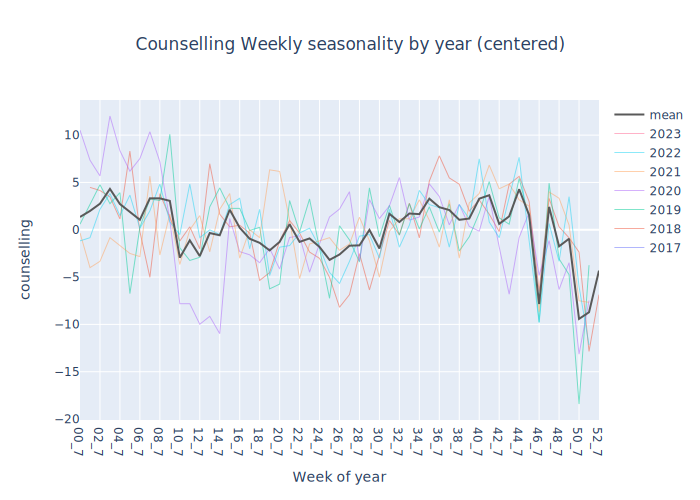

Description of the Mental Health column
count    262.000000
mean      41.662214
std        8.448671
min       24.000000
25%       36.166667
50%       40.666667
75%       46.083333
max       72.666667
Name: y, dtype: float64


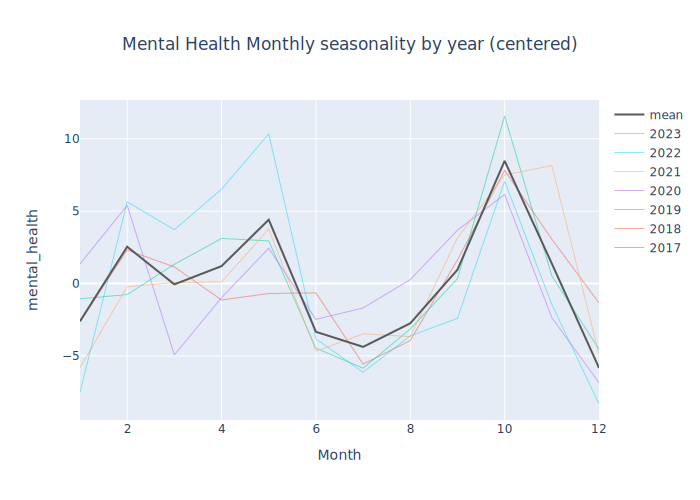

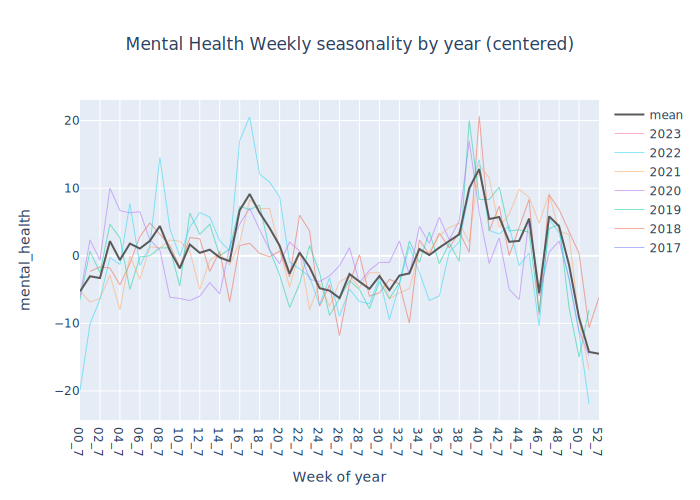

In [14]:
for search in searches_list:
    data_seasonality_stats(most_restricted, search)

### Least Restricted States

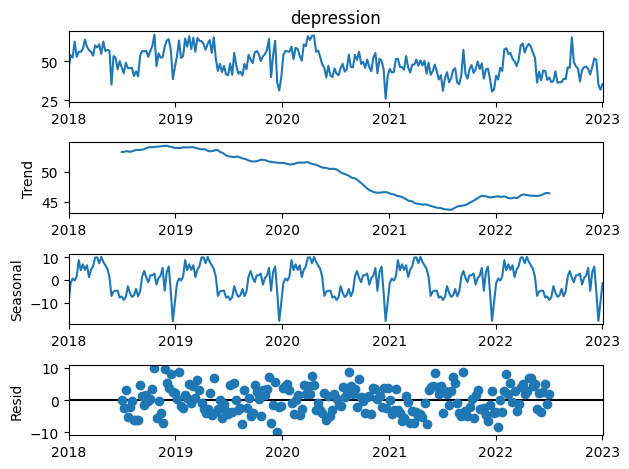

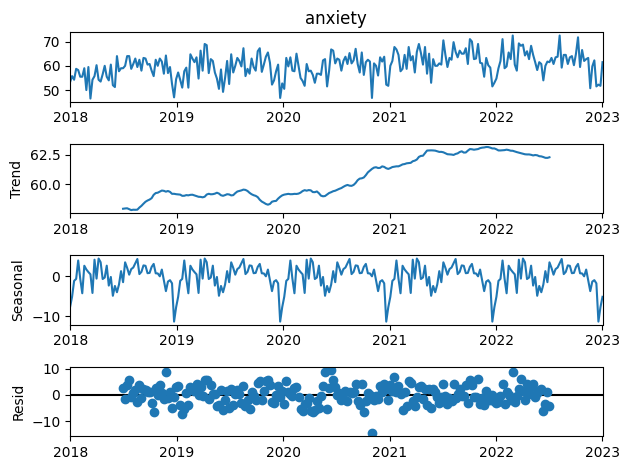

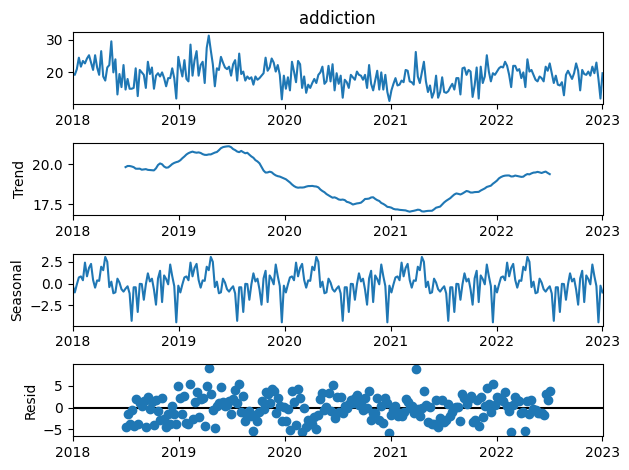

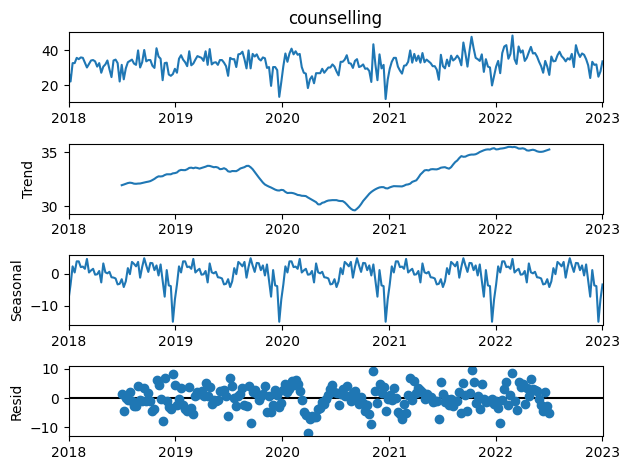

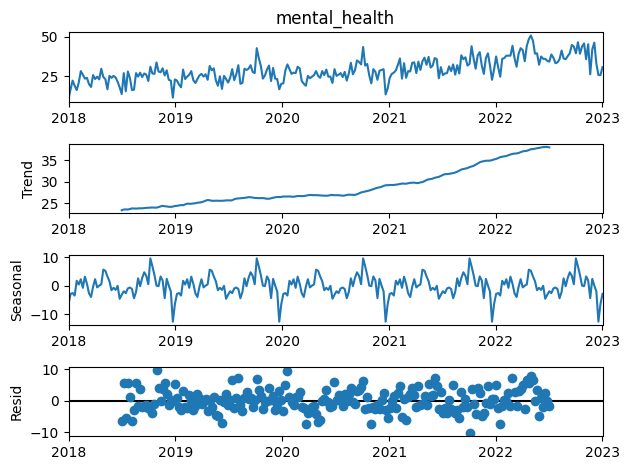

In [15]:
# Check seasonality
for search in searches_list:
    season_decomp(least_restricted, search)

The trends and Seasonality for Least restristed states are very close to Most Restricted.

Description of the Depression column
count    262.000000
mean      49.288168
std        8.409080
min       26.000000
25%       43.312500
50%       48.500000
75%       56.000000
max       67.000000
Name: y, dtype: float64


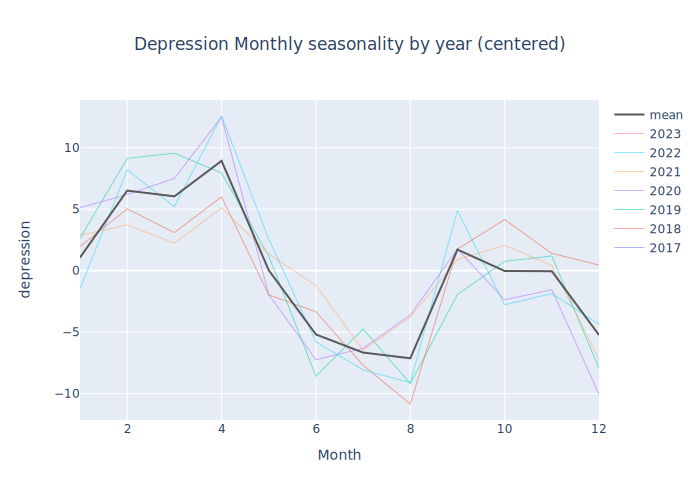

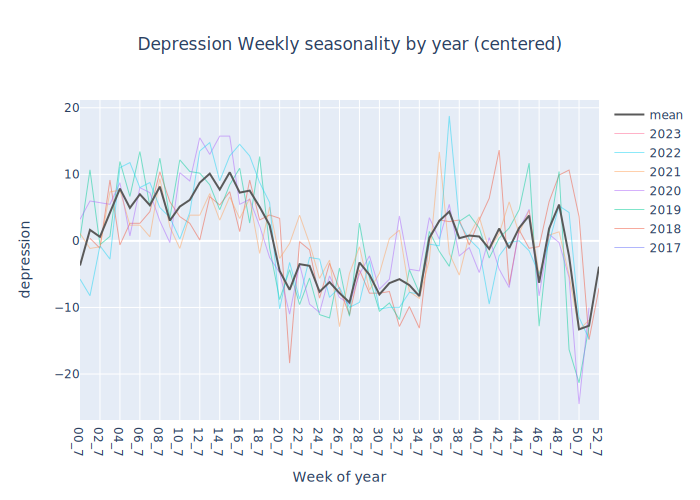

Description of the Anxiety column
count    262.000000
mean      60.258588
std        5.075076
min       46.500000
25%       57.250000
50%       60.625000
75%       63.500000
max       72.500000
Name: y, dtype: float64


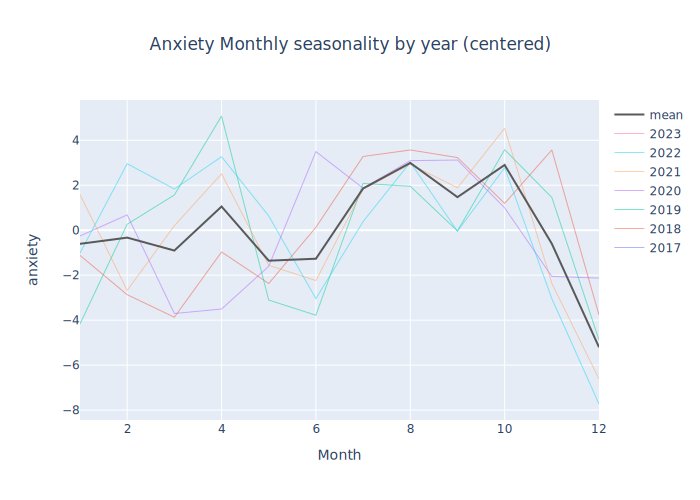

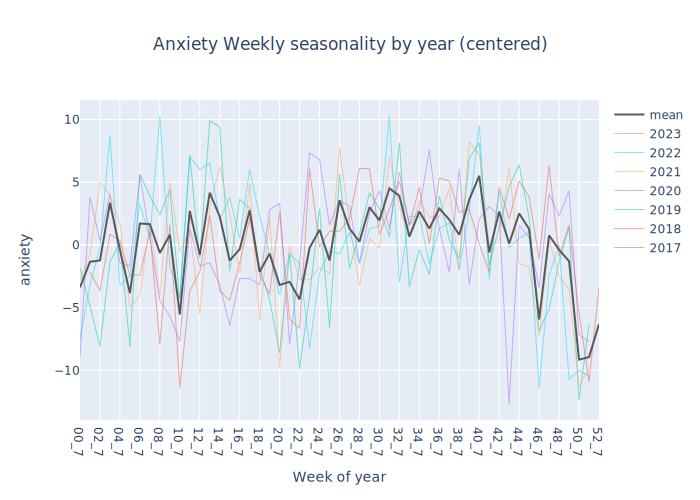

Description of the Addiction column
count    262.000000
mean      19.127863
std        3.434718
min       11.250000
25%       16.812500
50%       19.250000
75%       21.437500
max       31.250000
Name: y, dtype: float64


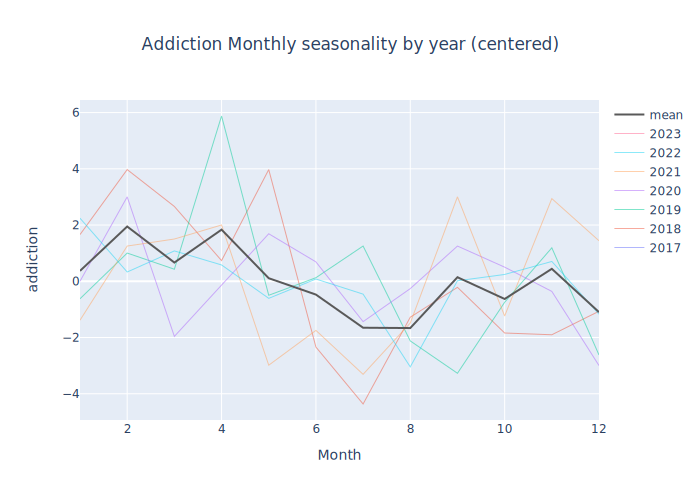

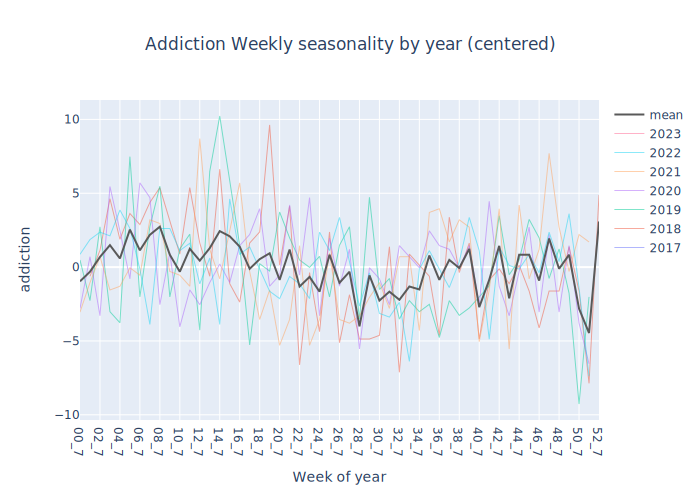

Description of the Counselling column
count    262.000000
mean      32.897901
std        5.212011
min       12.250000
25%       30.312500
50%       33.375000
75%       35.750000
max       48.500000
Name: y, dtype: float64


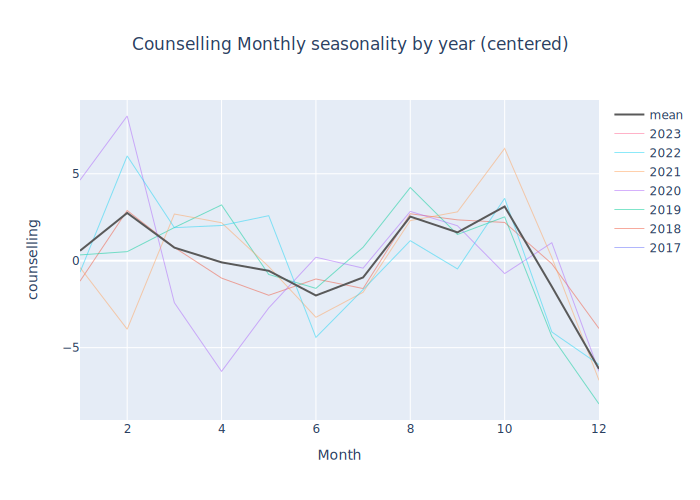

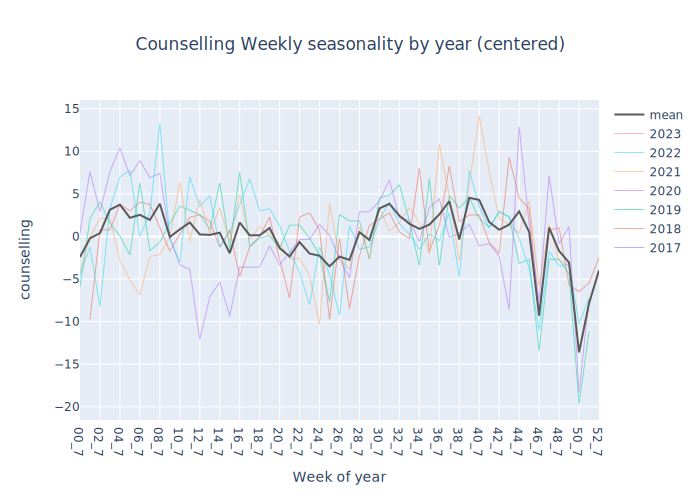

Description of the Mental Health column
count    262.000000
mean      29.051527
std        7.323774
min       10.750000
25%       24.000000
50%       28.000000
75%       33.687500
max       50.750000
Name: y, dtype: float64


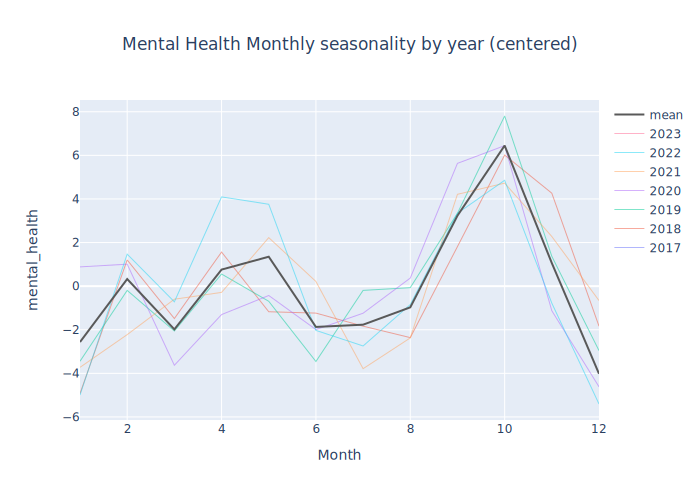

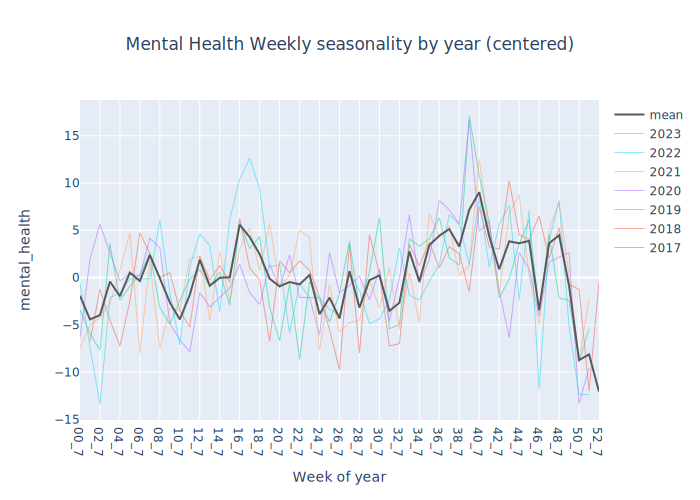

In [16]:
for search in searches_list:
    data_seasonality_stats(least_restricted, search)

Both the mean and median of the searches in the Least restricted states are lower than for Most restricted states.
Depression and Mental Health have the strongest seasonality

---

The Data is Stationary and have a Seasonal component. In the next notebook we will look at Autocorrelation and Trends of the data. 